In [1]:
!pip install yfinance

# importing libraries 

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")


# importing the data from yahoofinance

In [3]:
# Get the data
btc= yf.Ticker("BTC-USD")
df = btc.history(period="max")

## Exploratory Data Anaysis(EDA)

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [5]:

df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-12 00:00:00+00:00,21870.902344,22060.994141,21682.828125,21788.203125,17821046406,0.0,0.0
2023-02-13 00:00:00+00:00,21787.000000,21898.414062,21460.087891,21808.101562,23918742607,0.0,0.0
2023-02-14 00:00:00+00:00,21801.822266,22293.140625,21632.394531,22220.804688,26792596581,0.0,0.0
2023-02-15 00:00:00+00:00,22220.585938,24307.841797,22082.769531,24307.841797,32483312909,0.0,0.0
2023-02-16 00:00:00+00:00,24303.865234,24763.570312,24303.865234,24681.160156,36295106560,0.0,0.0


In [6]:
df.shape


(3075, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3075 entries, 2014-09-17 00:00:00+00:00 to 2023-02-16 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3075 non-null   float64
 1   High          3075 non-null   float64
 2   Low           3075 non-null   float64
 3   Close         3075 non-null   float64
 4   Volume        3075 non-null   int64  
 5   Dividends     3075 non-null   float64
 6   Stock Splits  3075 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 192.2 KB


In [8]:
df.drop(["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1,inplace=True)
df

,Close
Date,
2014-09-17 00:00:00+00:00,457.334015
2014-09-18 00:00:00+00:00,424.440002
2014-09-19 00:00:00+00:00,394.795990
2014-09-20 00:00:00+00:00,408.903992
2014-09-21 00:00:00+00:00,398.821014
...,...
2023-02-12 00:00:00+00:00,21788.203125
2023-02-13 00:00:00+00:00,21808.101562
2023-02-14 00:00:00+00:00,22220.804688


In [9]:
# Add the year, month, and day columns to the dataframe
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day






In [10]:


df

,Close,Year,Month,Day
Date,,,,
2014-09-17 00:00:00+00:00,457.334015,2014,9,17
2014-09-18 00:00:00+00:00,424.440002,2014,9,18
2014-09-19 00:00:00+00:00,394.795990,2014,9,19
2014-09-20 00:00:00+00:00,408.903992,2014,9,20
2014-09-21 00:00:00+00:00,398.821014,2014,9,21
...,...,...,...,...
2023-02-12 00:00:00+00:00,21788.203125,2023,2,12
2023-02-13 00:00:00+00:00,21808.101562,2023,2,13
2023-02-14 00:00:00+00:00,22220.804688,2023,2,14


# Data visualization

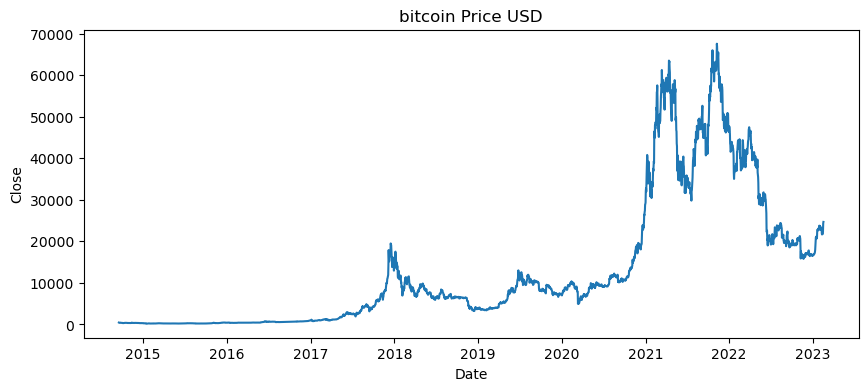

In [11]:






df.dropna()
plt.figure(figsize=(10, 4))
plt.title("bitcoin Price USD")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df["Close"])
plt.show()

In [12]:
#Splitting the dataset
X = df.drop( ['Close'], axis = 1)
Y = df['Close']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3075 entries, 2014-09-17 00:00:00+00:00 to 2023-02-16 00:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    3075 non-null   int64
 1   Month   3075 non-null   int64
 2   Day     3075 non-null   int64
dtypes: int64(3)
memory usage: 96.1 KB


In [14]:
Y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3075 entries, 2014-09-17 00:00:00+00:00 to 2023-02-16 00:00:00+00:00
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
3075 non-null   float64
dtypes: float64(1)
memory usage: 48.0 KB


In [15]:
#Splitting the data as the trainning & testing as 70-30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [16]:
X_train.head()

,Year,Month,Day
Date,,,
2015-08-27 00:00:00+00:00,2015,8,27
2018-09-07 00:00:00+00:00,2018,9,7
2021-09-08 00:00:00+00:00,2021,9,8
2016-09-16 00:00:00+00:00,2016,9,16
2022-04-15 00:00:00+00:00,2022,4,15


In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2152, 3)
(2152,)
(923, 3)
(923,)


# Algorithms

# KNeighborsRegressor

In [24]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)
mse_knr=metrics.mean_squared_error(y_test,y_pred_knr)
print(mse_knr)
r2knr = metrics.r2_score(y_test, y_pred_knr)
print(r2knr)

73909497.72598347
0.7271375889687257


# RandomForestRegressor

In [19]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse_rf=metrics.mean_squared_error(y_test,y_pred_rf)
print(mse_rf)
r2rf = metrics.r2_score(y_test, y_pred_rf)
print(r2rf)

898612.7913613186
0.9966824608422661


# DecisionTreeRegressor

In [20]:
dt =tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt=metrics.mean_squared_error(y_test,y_pred_dt)
print(mse_dt)
r2dt = metrics.r2_score(y_test, y_pred_dt)
print(r2dt)

1310040.641916884
0.9951635329815436


# GradientBoostingRegressor

In [21]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
Y_pred_gbr = gbr.predict(X_test)
mse_gbr=metrics.mean_squared_error(y_test,Y_pred_gbr)
print(mse_gbr)
r2gbr = metrics.r2_score(y_test, Y_pred_gbr)
print(r2gbr)

7386580.534007245
0.9727298894486016


# Finding the Best Model

In [22]:
print("*"*10, "R2 score", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2knr)
print("K nearest neighbors: ",mse_knr)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("random forest: ",mse_rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("decision tree: ",mse_dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2gbr)
print("gradient boosting: ",mse_gbr)
print("-"*30)

********** R2 score **********
------------------------------
K nearest neighbors:  0.7271375889687257
K nearest neighbors:  73909497.72598347
------------------------------
------------------------------
random forest:  0.9966824608422661
random forest:  898612.7913613186
------------------------------
------------------------------
decision tree:  0.9951635329815436
decision tree:  1310040.641916884
------------------------------
------------------------------
gradient boosting:  0.9727298894486016
gradient boosting:  7386580.534007245
------------------------------


# The Best Model To Predict these Data is RandomForestRegressor

In [26]:
rf.predict([[2023,2,16]])

array([23350.65498047])